In [17]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN   

<ipython-input-19-9cd4bd3c7b8b>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(),inplace=True)
<ipython-input-19-9cd4bd3c7b8b>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

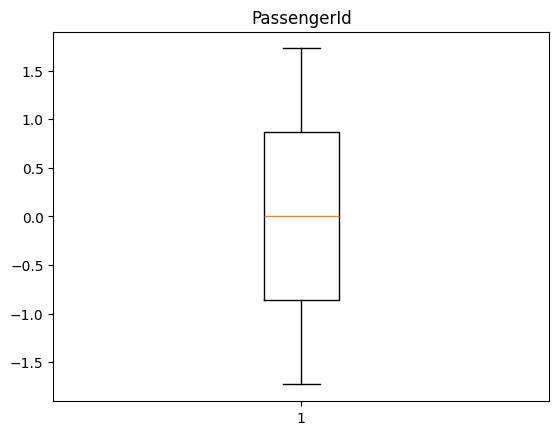

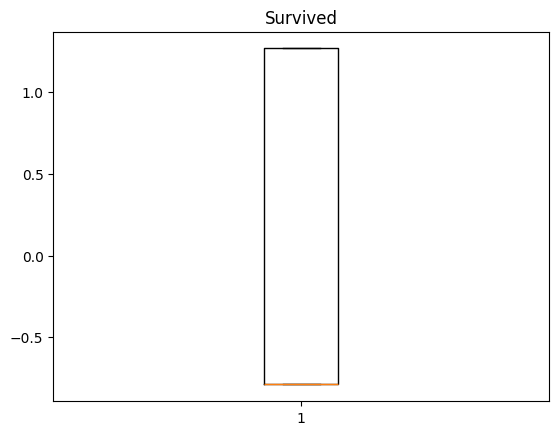

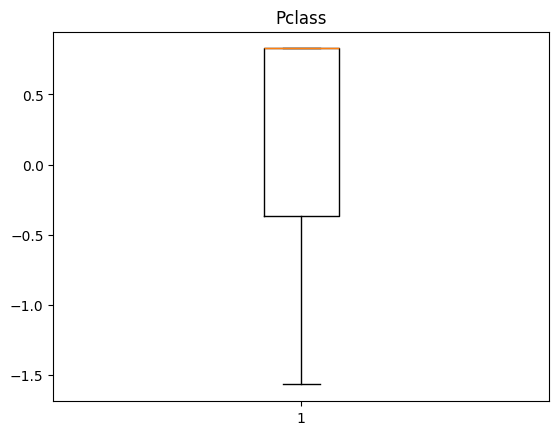

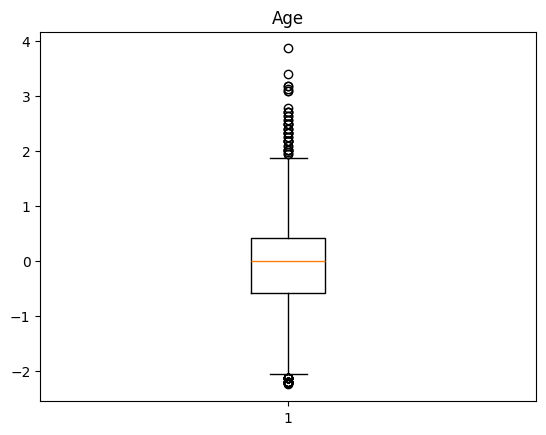

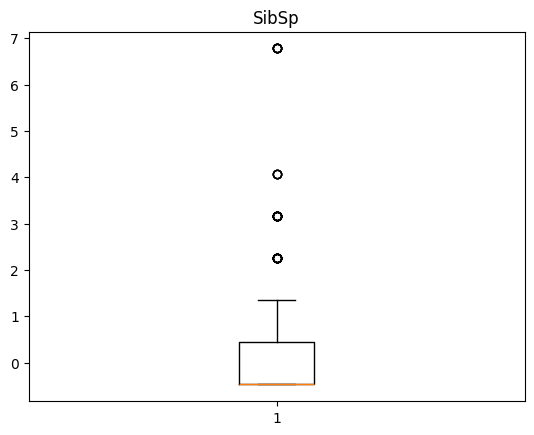

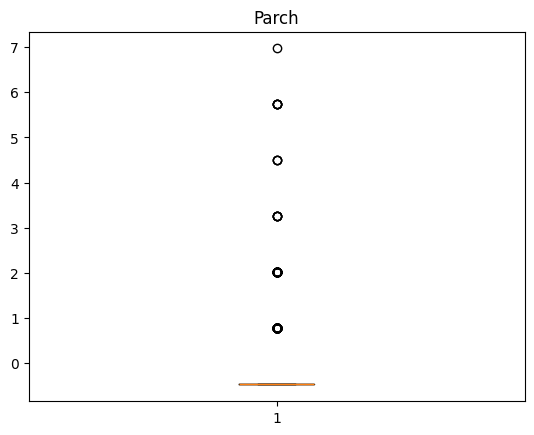

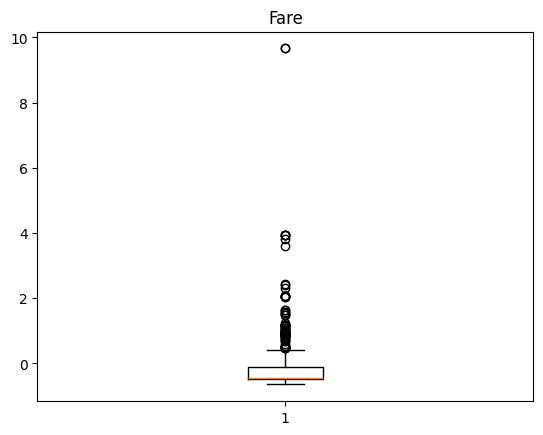

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Titanic-Dataset.csv')
print(df.columns.to_list())
print(df.head())

print(df.shape)
print(df.info())
print(df.nunique())
print(df.isnull().sum())



numeric_columns=df.select_dtypes(include=['number']).columns
string_columns=df.select_dtypes(include=['object']).columns

for column in numeric_columns:
  df[column].fillna(df[column].mean(),inplace=True)
for column in string_columns:
  df[column].fillna(df[column].mode()[0],inplace=True)

df=df.drop_duplicates()

for column in string_columns:
  df[column]=df[column].astype('category')
  df[column]=df[column].cat.codes

for column in numeric_columns:
  mean=df[column].mean()
  std=df[column].std()
  df[column]=(df[column]-mean)/std

for column in numeric_columns:
  plt.boxplot(df[column])
  plt.title(column)
  plt.show()

  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.729137,-0.788829,0.826913,108,1,-0.592148,0.432550,-0.473408,523,-0.502163,47,2
2,-1.721365,1.266279,0.826913,353,0,-0.284503,-0.474279,-0.473408,669,-0.488580,47,2
3,-1.717480,1.266279,-1.565228,272,0,0.407697,0.432550,-0.473408,49,0.420494,55,2
4,-1.713594,-0.788829,0.826913,15,1,0.407697,-0.474279,-0.473408,472,-0.486064,47,2
5,-1.709708,-0.788829,0.826913,554,1,0.000000,-0.474279,-0.473408,275,-0.477848,47,1
